# 안녕하세요^^ 
## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구별 업종 등록 데이터" 를 확인해 보도록 하겠습니다

In [29]:
# 필요 라이브러리부터 설치합니다.
# %pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.4 business_type_202401.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터(제공 가능한 최신 버전)
    * 택시 운송업 (개인택시 등록자 주거지)
    * 한식일반음식점업
    * 용달 화물자동차 운송업(개인용달 등록자 주거지)
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* 'business_type_202401.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터를 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [30]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

seoul_business = pd.read_csv('1.4 business_type_202401.csv',sep=",", encoding = 'UTF-8')

In [31]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_business.shape

(451, 22)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_business' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# info()
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구           451 non-null    object
 1   동             451 non-null    object
 2   다수업종 상위10     451 non-null    object
 3   다수업종 상위10.1   451 non-null    object
 4   다수업종 상위10.2   451 non-null    object
 5   다수업종 상위10.3   451 non-null    object
 6   다수업종 상위10.4   451 non-null    object
 7   다수업종 상위10.5   451 non-null    object
 8   다수업종 상위10.6   451 non-null    object
 9   다수업종 상위10.7   451 non-null    object
 10  다수업종 상위10.8   451 non-null    object
 11  다수업종 상위10.9   451 non-null    object
 12  다수업종 상위10.10  451 non-null    object
 13  다수업종 상위10.11  451 non-null    object
 14  다수업종 상위10.12  451 non-null    object
 15  다수업종 상위10.13  451 non-null    object
 16  다수업종 상위10.14  451 non-null    object
 17  다수업종 상위10.15  451 non-null    object
 18  다수업종 상위10.16  451 non-null    object
 19  다수업종 상위1

In [33]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# describe()
seoul_business.describe()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,다수업종 상위10.8,다수업종 상위10.9,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
count,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451
unique,27,425,226,280,176,305,177,180,142,205,121,180,131,239,69,147,127,189,113,222,107,230
top,송파구,소계,71,11,24,104,56,56,40,54,46,47,13,16,-,-,18,20,4,42,17,45
freq,28,25,7,7,11,6,8,9,11,9,12,10,18,8,82,82,14,10,15,10,16,9


In [34]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# head()
seoul_business.head()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,다수업종 상위10.8,다수업종 상위10.9,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,두발미용업,두발미용업,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636","18,080","36,214","16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,261,480,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,28,66,124,525,2,18,74,177,9,34,45,220


In [35]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# tail()
seoul_business.tail()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,다수업종 상위10.8,다수업종 상위10.9,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
446,강동구,성내3동,120,120,135,390,73,73,104,163,83,113,54,133,10,86,57,103,66,199,44,164
447,강동구,둔촌2동,117,436,63,249,89,89,61,108,62,75,34,85,10,788,21,39,35,90,24,101
448,강동구,암사1동,209,372,71,195,153,153,67,107,82,114,29,59,3,6,47,98,31,67,34,98
449,강동구,천호2동,157,187,152,509,144,151,97,188,83,168,63,212,4,17,95,268,24,42,69,245
450,강동구,길동,"1,441","1,557",152,436,217,225,146,237,121,193,71,228,6,126,122,294,39,136,70,224


#### [실습문제3] 데이터 확인 및 처리

* head 와 tail 을 보았을때, 어느 데이터만 가져와야 할지 생각 해 봅시다.
* 두번째 행부터 데이터가 시작된다.

In [36]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# header=1
seoul_business = pd.read_csv('1.4 business_type_202401.csv', sep=",", encoding = "UTF-8", header=1)


In [37]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# DataFrame 출력 시 모든 열을 표시하도록 설정
pd.set_option('display.max_columns', None)

In [38]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# head()
seoul_business.head()

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,두발미용업,두발미용업.1,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
1,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636","18,080","36,214","16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
2,종로구,소계,215,215,"1,548","5,912",618,646,549,889,261,480,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
3,종로구,사직동,7,7,230,982,12,12,57,96,28,66,124,525,2,18,74,177,9,34,45,220
4,종로구,삼청동,5,5,42,145,4,4,9,10,-,-,66,243,2,3,3,8,-,-,7,33


In [39]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 구별 등록 업종 중 버스정류장 설치에 중요한 업종 데이터만 불러오기
# 예 : 대중교통 이동수요가 높을 것으로 예상되는 업종, 종사자수가 많은 업종
# 요식업이 늦게까지 일하고, 알바생들이 많기 때문에 대중교통 이동 수요가 높을 것이다.
seoul_business = seoul_business.iloc[:,[0,1,3,5,13,17,21]]
seoul_business.head()

,자치구,동,택시운송업.1,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,한식 육류요리 전문점.1
0,자치구,동,종사자수,종사자수,종사자수,종사자수,종사자수
1,합계,합계,"76,701","100,183","57,322","31,371","44,653"
2,종로구,소계,215,"5,912","3,613","1,413","1,982"
3,종로구,사직동,7,982,525,177,220
4,종로구,삼청동,5,145,243,8,33


In [40]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# '동' 열이 '소계'인 행만을 필터링 (구별 데이터만 필요함)

seoul_business=seoul_business.loc[seoul_business["동"]=="소계"]
seoul_business.reset_index(drop=True,inplace=True)

In [41]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# '동' 열 제거
seoul_business.drop(columns="동",axis=1,inplace=True)


In [42]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# head()
seoul_business.head()

,자치구,택시운송업.1,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,한식 육류요리 전문점.1
0,종로구,215,"5,912","3,613","1,413","1,982"
1,중구,235,"6,414","3,542",982,"2,121"
2,용산구,523,"2,987","2,076","1,332","1,184"
3,성동구,"2,527","2,785","1,859",621,"1,545"
4,광진구,"1,744","2,861","1,887","1,577","1,678"


In [43]:
# 쉼표(,) 제거 후 열을 int로 변환
for col in ['한식 일반 음식점업.1', '커피전문점.1', '기타주점업.1', '한식 육류요리 전문점.1','택시운송업.1']:
    seoul_business[col] = seoul_business[col].str.replace(',', '').astype(int)

In [44]:
# 해당 데이터프레임을 csv 파일로 저장하세요.
seoul_business.to_csv("seoul_business.csv", index=False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [45]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

#### [실습문제4] 데이터 분포 알아보기
* 여러 변수들을 다양한 그래프로 그려보고 인사이트를 도출해보세요.

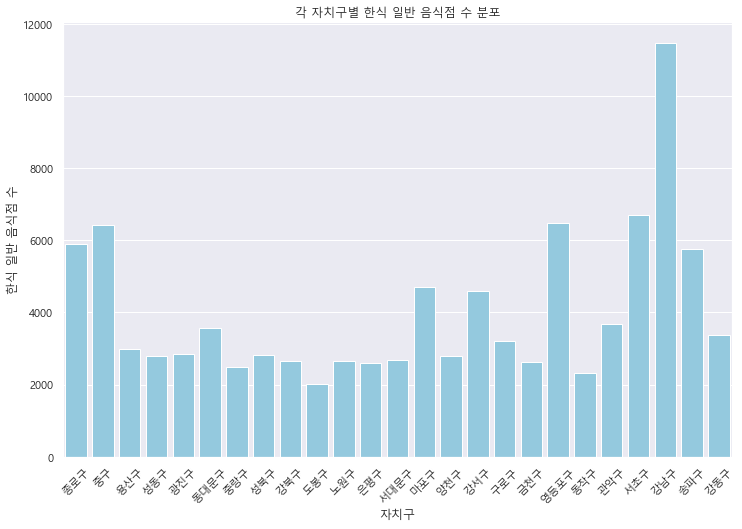

In [46]:
# 카테고리별 상점 수 분포 시각화 - 한식 일반 음식점업
plt.figure(figsize=(12, 8))
sns.barplot(data=seoul_business, x='자치구', y='한식 일반 음식점업.1', color='skyblue')
plt.title('각 자치구별 한식 일반 음식점 수 분포')
plt.xlabel('자치구')
plt.ylabel('한식 일반 음식점 수')
plt.xticks(rotation=45)
plt.show()

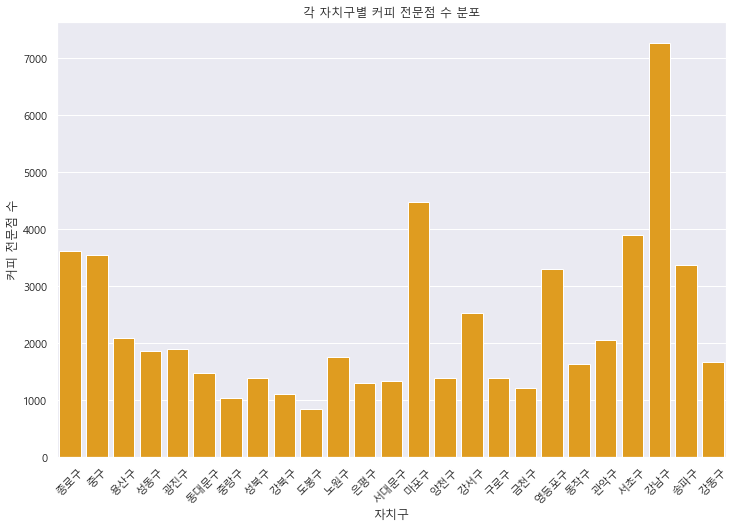

In [47]:
# 카테고리별 상점 수 분포 시각화 - 커피전문점
plt.figure(figsize=(12, 8))
sns.barplot(data=seoul_business, x='자치구', y='커피전문점.1', color='orange')
plt.title('각 자치구별 커피 전문점 수 분포')
plt.xlabel('자치구')
plt.ylabel('커피 전문점 수')
plt.xticks(rotation=45)
plt.show()

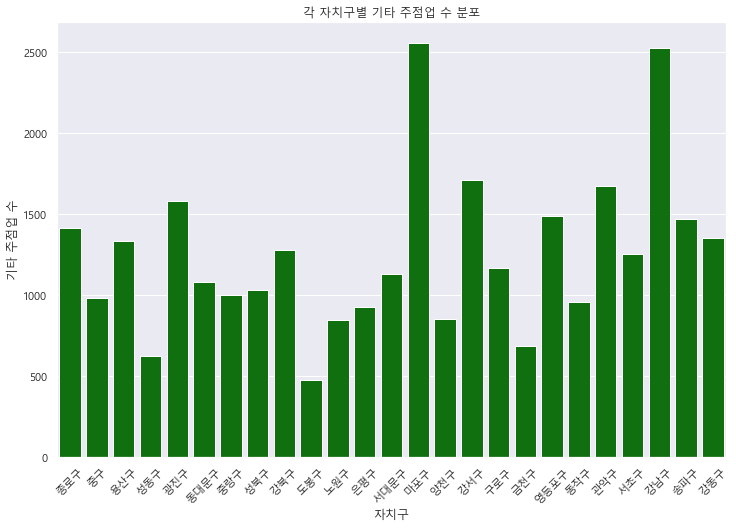

In [48]:

# 카테고리별 상점 수 분포 시각화 - 기타주점업
plt.figure(figsize=(12, 8))
sns.barplot(data=seoul_business, x='자치구', y='기타주점업.1', color='green')
plt.title('각 자치구별 기타 주점업 수 분포')
plt.xlabel('자치구')
plt.ylabel('기타 주점업 수')
plt.xticks(rotation=45)
plt.show()

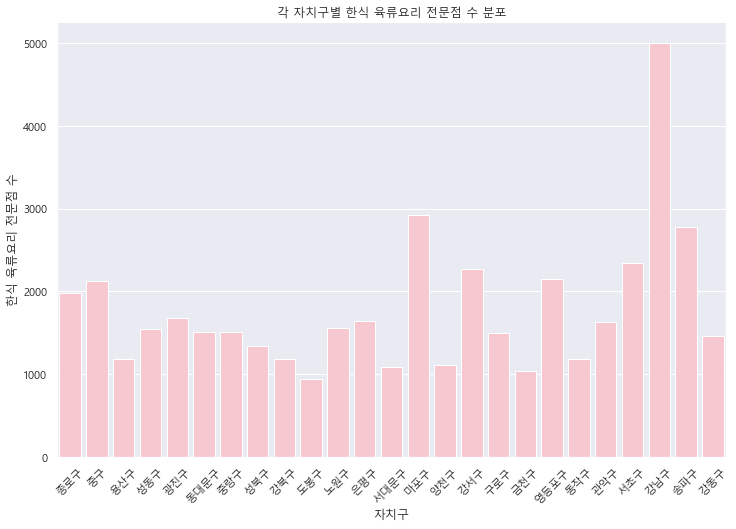

In [49]:
# 카테고리별 상점 수 분포 시각화 - 한식 육류요리 전문점
plt.figure(figsize=(12, 8))
sns.barplot(data=seoul_business, x='자치구', y='한식 육류요리 전문점.1', color='pink')
plt.title('각 자치구별 한식 육류요리 전문점 수 분포')
plt.xlabel('자치구')
plt.ylabel('한식 육류요리 전문점 수')
plt.xticks(rotation=45)
plt.show()

   자치구  택시운송업.1  한식 일반 음식점업.1  커피전문점.1  기타주점업.1  한식 육류요리 전문점.1  총 상점 수
0  종로구      215          5912     3613     1413           1982   13135
1   중구      235          6414     3542      982           2121   13294
2  용산구      523          2987     2076     1332           1184    8102
3  성동구     2527          2785     1859      621           1545    9337
4  광진구     1744          2861     1887     1577           1678    9747


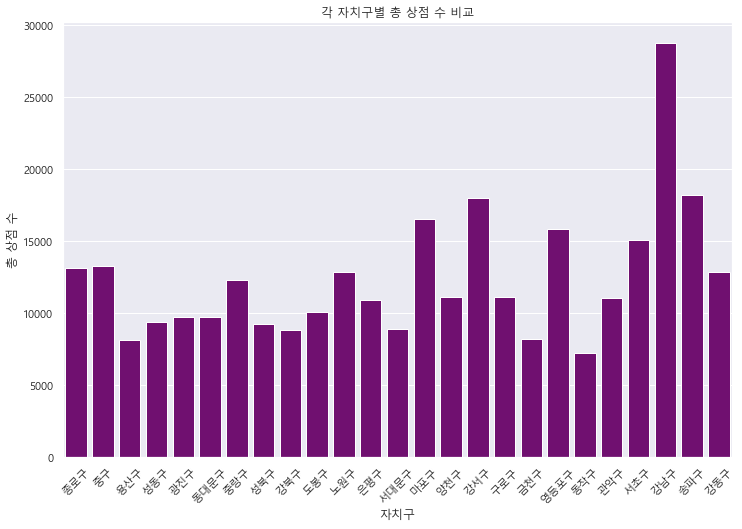

In [50]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 자치구별 카테고리별 상점 수의 합을 나타내는 새로운 열 추가
seoul_business['총 상점 수'] = seoul_business.iloc[:, 1:].sum(axis=1)

# 새로운 열 추가 후 확인
print(seoul_business.head())

# 총 상점 수 비교를 위한 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=seoul_business, x='자치구', y='총 상점 수', color='purple')
plt.xticks(rotation=45)
plt.title('각 자치구별 총 상점 수 비교')
plt.xlabel('자치구')
plt.ylabel('총 상점 수')
plt.show()

In [51]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

In [52]:
seoul_business

,자치구,택시운송업.1,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,한식 육류요리 전문점.1,총 상점 수
0,종로구,215,5912,3613,1413,1982,13135
1,중구,235,6414,3542,982,2121,13294
2,용산구,523,2987,2076,1332,1184,8102
3,성동구,2527,2785,1859,621,1545,9337
4,광진구,1744,2861,1887,1577,1678,9747
5,동대문구,2093,3566,1472,1082,1509,9722
6,중랑구,6262,2479,1037,1000,1504,12282
7,성북구,2643,2822,1384,1030,1334,9213
8,강북구,2589,2663,1095,1275,1176,8798
9,도봉구,5783,2009,837,477,943,10049


In [53]:
# 마포,관악, 강남, 강서, 광진구에 주점이 많다.
#총 상점수는 강남구가 두드러지게 높지만, 종로구, 중구, 마포구, 영등포구,서초구, 송파구도 매우높다.